In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # whatever graphs we are plotting in seaborn plot it using plotly

In [146]:
df = pd.read_csv('/content/drive/MyDrive/Data_Analysis /Python/Projects/Laptop_Price_Analysis /laptop_price.csv', encoding = 'unicode_escape') # we can also use encoding = 'latin'
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [148]:
df['TypeName'].value_counts()

,count
TypeName,
Notebook,727
Gaming,205
Ultrabook,196
2 in 1 Convertible,121
Workstation,29
Netbook,25


# **Data Cleaning**

In [149]:
df.drop(columns = ['laptop_ID', 'Product'],inplace= True)

In [150]:
df.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


In [151]:
df.duplicated().sum()

29

In [152]:
df.drop_duplicates(inplace = True)

In [153]:
df.shape

(1274, 11)

In [154]:
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
441,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,749.0
354,Toshiba,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Nvidia GeForce 930M,Windows 10,2.4kg,1403.0
336,Dell,Ultrabook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce 940MX,Windows 10,1.9kg,1049.0


## Price column

In [155]:
# convert euros intp INR
# 89.07 INR  >> 1 euro
# 299.0 * 89.07 = INR

#round off values
# reassigning to the column
#V comnert into "int"

df['Price_euros'] = round(df['Price_euros'] * 89.07).astype('int')

In [156]:
df.rename(columns = {'Price_euros':'Price'}, inplace = True)

In [157]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,119326
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,80069
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,51215
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,226011
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,160647


## Ram Column

In [158]:
# Converting Ram col from object to int for that we remove GB

df['Ram'].value_counts()

,count
Ram,
8GB,613
4GB,366
16GB,198
6GB,35
12GB,25
32GB,17
2GB,16
24GB,3
64GB,1


In [159]:
a = '4GB'
type(a)

str

In [160]:
# using string function we remove GB
a.replace("GB", "")


'4'

In [161]:
# lambda = to apply a function on entire column at once
(lambda a :a.replace("GB", ""))('16GB')

'16'

In [162]:
df['Ram'].apply(lambda a :a.replace("GB", ""))

,Ram
0,8
1,8
2,8
3,16
4,8
...,...
1269,4
1270,4
1271,16
1272,2


In [163]:
df['Ram'].apply(lambda a :a.replace("GB", "")).astype('int')

,Ram
0,8
1,8
2,8
3,16
4,8
...,...
1269,4
1270,4
1271,16
1272,2


In [164]:
df['Ram'] = df['Ram'].apply(lambda a :a.replace("GB", "")).astype('int')

In [165]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,119326
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,80069
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,51215
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,226011
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,160647


In [166]:
#str formatting
name = 'Asmita'
print(f'My name is {name}')

My name is Asmita


In [167]:
print("my name is", name)

my name is Asmita


**Visualization**

<Axes: xlabel='Ram'>

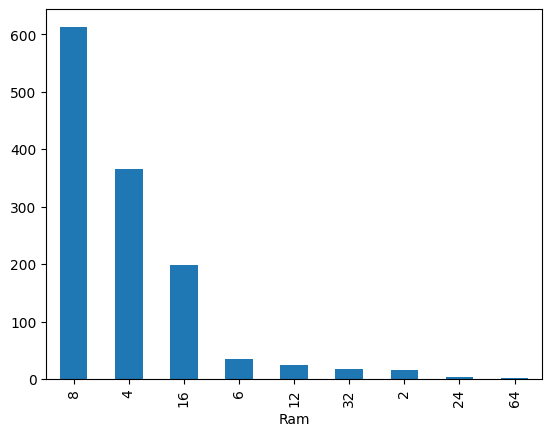

In [168]:
df['Ram'].value_counts().plot(kind = 'bar') # it give us frequency

In [169]:
df['Ram'].value_counts()

,count
Ram,
8,613
4,366
16,198
6,35
12,25
32,17
2,16
24,3
64,1


In [170]:
df.describe()

,Inches,Ram,Price
count,1274.000000,1274.000000,1274.000000
mean,15.022449,8.444270,101145.241758
std,1.429940,5.098291,62411.218359
min,10.100000,2.000000,15498.000000
25%,14.000000,4.000000,54324.250000
50%,15.600000,8.000000,88090.000000
75%,15.600000,8.000000,133360.250000
max,18.400000,64.000000,543238.000000


<Axes: xlabel='Ram', ylabel='Price'>

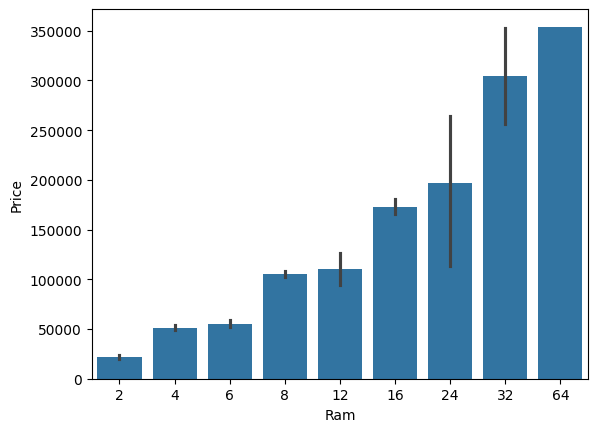

In [171]:
sns.barplot(x = df['Ram'], y = df['Price'])

Documentation

In [172]:
#it generates a bar plot of the RAM values and it showing the comparison between RAM and laptop price.
# here we can see how ram colomn affecting the price column. where 64 gb laptops are more costly campare to 32, 24, 16.
# the black line on the bar represents outliers (indicates the range of minimum and maximum price).
#In 64gb their is no black line because they have only one laptop.
# In 24 gb there are more outliers, it having high price laptop as well as low price laptop.


In [173]:
# plot the graph using plotly
fig = px.bar(df, x='Ram', y='Price')
fig.show()

# Weight Column


In [174]:
# convert weight col from object to float
a = '1.37kg'
a.replace("kg", "")

'1.37'

In [175]:
(lambda a : a.replace ("kg", ""))('1.35kg')

'1.35'

In [176]:
df['Weight'].apply(lambda a : a.replace ("kg", "")).astype('float')

,Weight
0,1.37
1,1.34
2,1.86
3,1.83
4,1.37
...,...
1269,2.20
1270,1.80
1271,1.30
1272,1.50


In [177]:
df['Weight'] = df['Weight'].apply(lambda a : a.replace ("kg", "")).astype('float')

In [178]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,119326
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,80069
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,51215
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,226011
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,160647


In [179]:
df['Weight'].value_counts()

,count
Weight,
2.20,119
2.10,58
2.00,45
2.40,42
2.50,38
...,...
4.50,1
1.14,1
3.80,1


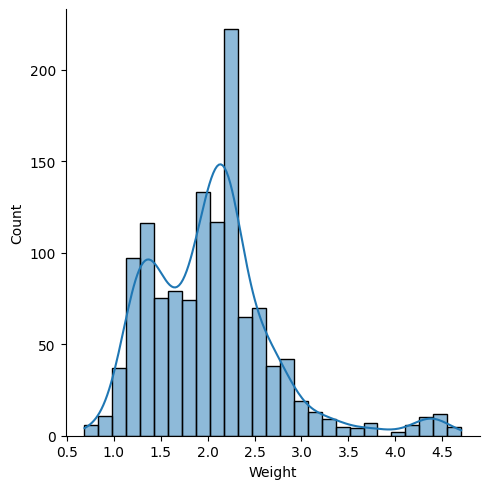

In [180]:
sns.displot(x= df['Weight'], kde = True) # kde>> it represent the data using a continous probability density curve in one or more dimensions.
 # here created some bins : Bins are the intervals of numeric values that each bar in a histogram covers.
#They are also sometimes called "intervals", "classes", or "buckets".
#Bins are used to group data into equal-width intervals, and then count how many data points fall into each interval

<Axes: xlabel='Weight', ylabel='Price'>

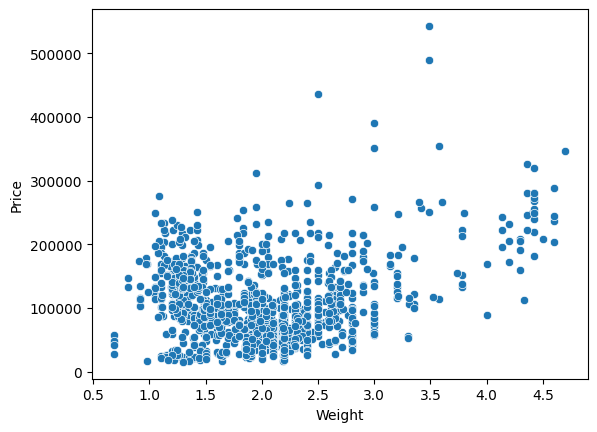

In [181]:
sns.scatterplot(x = df['Weight'], y = df['Price']) # more number of rows

## Documentation

In [182]:
# from above scatterplot we can see price increases with respect to weight.
# but here are some laptops where weight is 3.5 but price range is high, we can call it Outliers

In [183]:
# plot the graph using plotly
fig = px.scatter(df, x='Weight', y='Price')
fig.show()

## Company Column

In [184]:
df['Company'].value_counts()

,count
Company,
Dell,291
Lenovo,289
HP,268
Asus,151
Acer,101
MSI,54
Toshiba,48
Apple,21
Samsung,9


In [185]:
df.shape #before dropping companies

(1274, 11)

<Axes: xlabel='Company'>

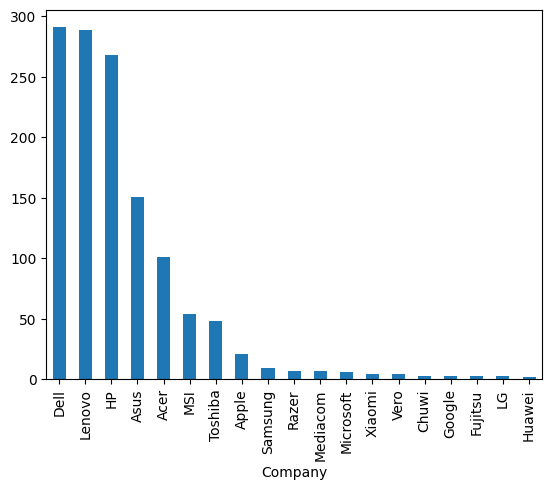

In [186]:
df['Company'].value_counts().plot(kind='bar')

In [187]:
#filtering for companies which has repeated more than 10 times in dataset
df=df[df.groupby('Company')["Company"].transform('count')>10]

In [188]:
df['Company'].value_counts()

,count
Company,
Dell,291
Lenovo,289
HP,268
Asus,151
Acer,101
MSI,54
Toshiba,48
Apple,21


In [189]:
df.shape #after dropping companies

(1223, 11)

<Axes: xlabel='Company', ylabel='Price'>

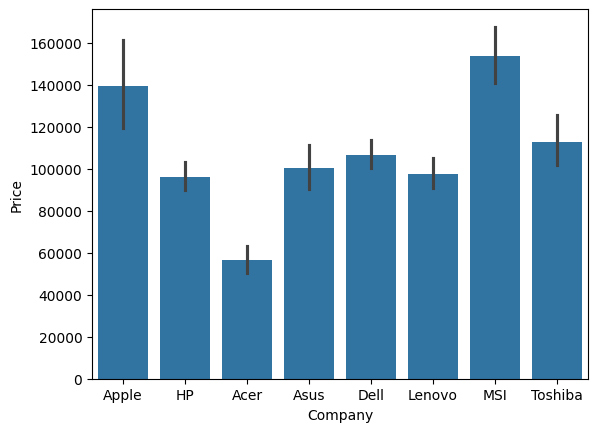

In [190]:
#plot using seaborn
sns.barplot(x = df['Company'], y = df['Price'])

In [191]:
# plot the graph using plotly
fig = px.bar(df, x='Company', y='Price')
fig.show()

# Documentation

In [192]:
#from above graph we can see the comparison between companies and price
#where MSI laptops are more costly compare to others.MSI are gaming laptops which are kind of costly.
#in our dataset there are only 21 apple laptops still the price bar is kind of matching with MSI.
# in each companies having some outliers. and many outliers in apple because we have data of only 21 laptops
# where one would a maximum range and another minimum range.

# TypeName Laptops

In [193]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
366,Dell,Notebook,17.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,128GB SSD + 1TB HDD,AMD Radeon 530,Windows 10,2.8,96641


In [194]:
df['TypeName'].value_counts()

,count
TypeName,
Notebook,687
Gaming,200
Ultrabook,171
2 in 1 Convertible,114
Workstation,29
Netbook,22


<Axes: xlabel='TypeName'>

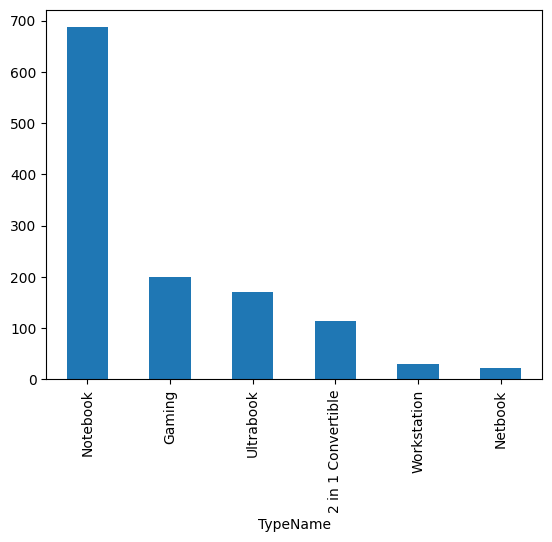

In [195]:
df['TypeName'].value_counts().plot(kind = 'bar')

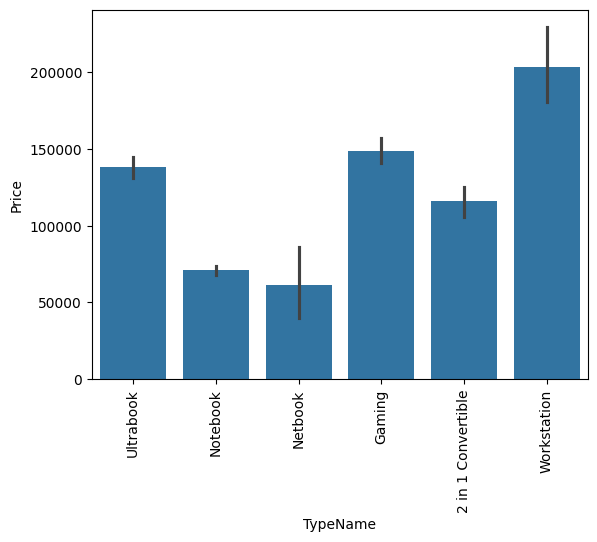

In [196]:
sns.barplot(x = df['TypeName'], y = df['Price'])
plt.xticks(rotation = 90)
plt.show()

In [197]:
# workstation laptops used in companies to work on bulk softwares,
# thats why the having more price convection compare to gaming, ultrabook and others.
#top 3 are workstation, gaming, ultrabook.

# Inches column

In [198]:
df['Inches'].value_counts()

,count
Inches,
15.6,636
14.0,182
17.3,162
13.3,152
12.5,37
11.6,29
12.0,6
13.9,6
15.4,4


In [199]:
df.shape

(1223, 11)

In [200]:
#filtering for Inches which has repeated more than 1 times in dataset
df=df[df.groupby('Inches')["Inches"].transform('count')>10]

In [201]:
df['Inches'].value_counts()

,count
Inches,
15.6,636
14.0,182
17.3,162
13.3,152
12.5,37
11.6,29


In [202]:
df.shape

(1198, 11)

<Axes: xlabel='Inches'>

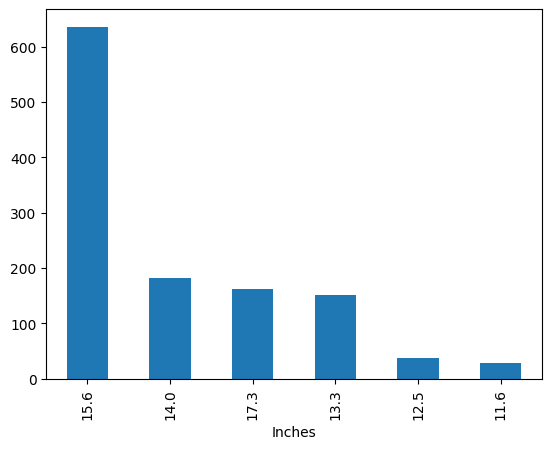

In [203]:
df['Inches'].value_counts().plot(kind = 'bar')

<ipython-input-204-c6e38a986729>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Inches', ylabel='Price'>

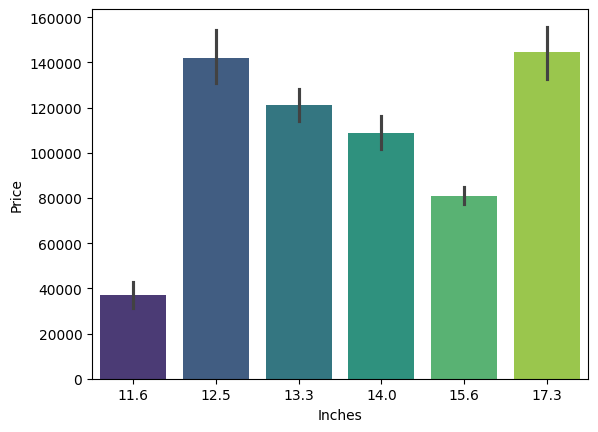

In [204]:
#inches vs Price
sns.barplot(x = df['Inches'], y = df['Price'], palette='viridis')

<ipython-input-205-13c02f021d11>:1: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



<Axes: xlabel='Inches', ylabel='Price'>

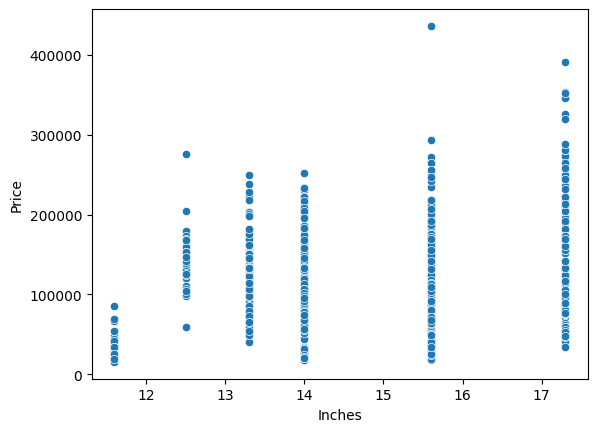

In [205]:
sns.scatterplot(x = df['Inches'], y = df['Price'], palette='viridis')

In [206]:
# here we see comparison in between price and inches, in scatterplot we can see outliers more clearly.
#the outlier which is away from group in between 15 to 16 range.
# we compare both graph where we can see which graph is fesible for the analysis. here more than scatter plot the bar graph making more sence with the outliers.

## Screen Resolution

In [207]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,491
1366x768,256
IPS Panel Full HD 1920x1080,217
Full HD / Touchscreen 1920x1080,44
IPS Panel Full HD / Touchscreen 1920x1080,43
1600x900,22
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


splitting


In [208]:
#we have extract 1920x1080 for that we have to split str
a= 'IPS Panel Full HD / Touchscreen 1920x1080'

In [209]:
#to extract 1920x1080 by indexing we can take 6 but in some cases there only 1 or 2 index so here we use -1
a.split()[-1]

'1920x1080'

In [210]:
# we want both values separately so we apply again split on'x'
a.split()[-1].split('x')

['1920', '1080']

In [211]:
#for x resolution we use [0]
a.split()[-1].split('x')[0]

'1920'

In [212]:
#for y resolution we use [1]
a.split()[-1].split('x')[1]

'1080'

In [213]:
#to apply this on whole column we use LAMBDA function
(lambda x : x.split()[-1].split('x')[0])('Quad HD+ 3200x1800') #x_res

'3200'

In [214]:
(lambda x : x.split()[-1].split('x')[1])('Quad HD+ 3200x1800') #y_res

'1800'

In [215]:
#convert it into str to int
df['X_res'] = df['ScreenResolution'].apply((lambda x : x.split()[-1].split('x')[0])).astype('int')

In [216]:
df['Y_res'] = df['ScreenResolution'].apply((lambda x : x.split()[-1].split('x')[1])).astype('int')

In [217]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,119326,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,80069,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,51215,1920,1080
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,160647,2560,1600
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,35628,1366,768


In [218]:
#comparison between treditional funtion vs lambda funtion
def pow (a,b):
  a**b
  #logic body of function
  return a**b

In [219]:
pow(2,3)

8

In [220]:
x = lambda a : a**2

In [221]:
x(2)

4

In [222]:
# Lambda Theory with practical explaination

In [223]:
#Assignment to add a column for ppi
# by using x_res, y_res and inches

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1198 entries, 0 to 1273
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1198 non-null   object 
 1   TypeName          1198 non-null   object 
 2   Inches            1198 non-null   float64
 3   ScreenResolution  1198 non-null   object 
 4   Cpu               1198 non-null   object 
 5   Ram               1198 non-null   int64  
 6   Memory            1198 non-null   object 
 7   Gpu               1198 non-null   object 
 8   OpSys             1198 non-null   object 
 9   Weight            1198 non-null   float64
 10  Price             1198 non-null   int64  
 11  X_res             1198 non-null   int64  
 12  Y_res             1198 non-null   int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 131.0+ KB


In [225]:
#lambda function
add = lambda a,b : a+b

In [226]:
add (2,3)

5

In [227]:
#normal function
def add(x,y):
  return x + y

In [228]:
add (2,3)

5

In [229]:
#add a column for ppi
# by using x_res, y_res and inches

ppi = insquereroot((horizontalpixel)^2 + (verticalpixel)^2) / diagonalscreensize

Pixels per inch (PPI) refers to the number of pixels contained within each inch of a digital image. It also refers to the set number of pixels a screen can display. Generally speaking, the higher the PPI, the better the image quality.


In [230]:
df['ppi'] = round(((df['X_res']**2) + (df['Y_res']**2))**0.5 / df['Inches'],2)

In [231]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,119326,2560,1600,226.98
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,80069,1440,900,127.68
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,51215,1920,1080,141.21
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,160647,2560,1600,226.98
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,35628,1366,768,100.45


In [232]:
#ppi vs Price Analysis
df['ppi'].value_counts()

,count
ppi,
141.21,419
100.45,194
127.34,131
157.35,122
165.63,100
111.94,42
135.09,28
276.05,25
176.23,25


<Axes: xlabel='ppi', ylabel='Price'>

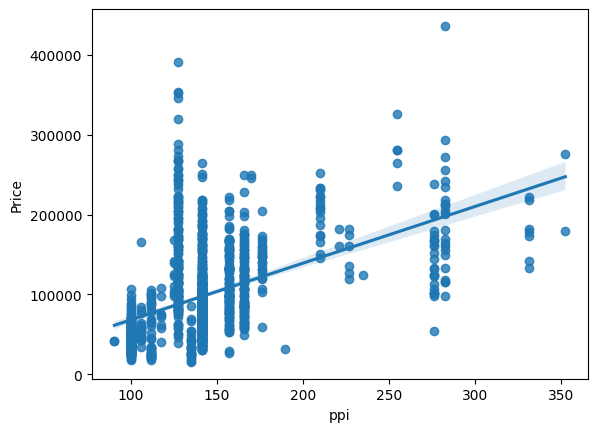

In [233]:
sns.regplot(x = df['ppi'] , y = df['Price'])

IQ. what does this line signifieces?
ans. the equ of this line is y=mx+c. it is the hyperplane it diffrentiate between the two clusters

In [234]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,491
1366x768,256
IPS Panel Full HD 1920x1080,217
Full HD / Touchscreen 1920x1080,44
IPS Panel Full HD / Touchscreen 1920x1080,43
1600x900,22
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [235]:
a = 'IPS Panel Full HD / Touchscreen 1920x1080'
#if there is IPS in this str return 1 else 0
(lambda a : 1 if 'IPS' in a else 0)('IPS Panel Full HD / Touchscreen 1920x1080')

1

In [236]:
df['IPS'] = df['ScreenResolution'].apply(lambda a : 1 if 'IPS' in a else 0)

In [237]:
df.sample(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,ppi,IPS
382,Asus,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.3,147411,1920,1080,141.21,1
884,Dell,Notebook,15.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.2,32867,1366,768,100.45,0


In [238]:
df['Touch Screen'] = df['ScreenResolution'].apply(lambda a : 1 if "Touchscreen" in a else 0)

In [239]:
df.sample(4)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,ppi,IPS,Touch Screen
198,HP,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3.35,122828,1920,1080,127.34,1,0
862,Toshiba,Notebook,13.3,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.05,114455,1920,1080,165.63,0,0
660,Dell,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.56,109467,1920,1080,157.35,0,0
234,Acer,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.60,61369,1920,1080,165.63,1,1


<Axes: xlabel='Touch Screen'>

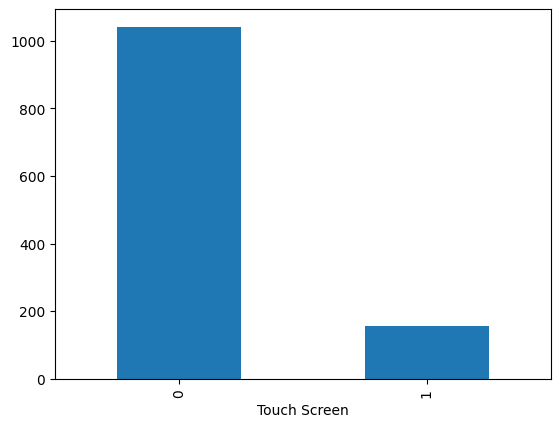

In [240]:
df['Touch Screen'].value_counts().plot(kind ='bar')

<Axes: xlabel='IPS'>

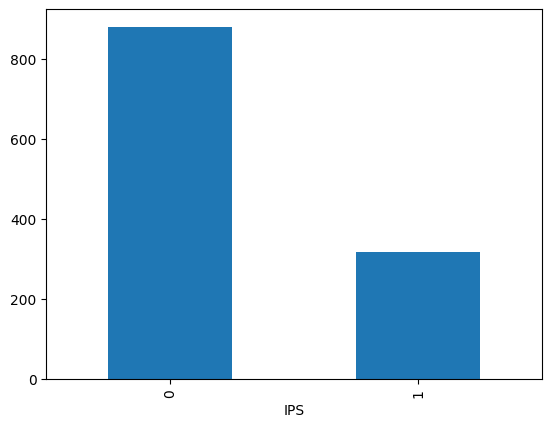

In [241]:
df['IPS'].value_counts().plot(kind ='bar')

In [242]:
df.drop(columns = ['ScreenResolution','Inches','X_res','Y_res'],inplace = True)

In [243]:
df.shape

(1198, 12)

<Axes: xlabel='Cpu'>

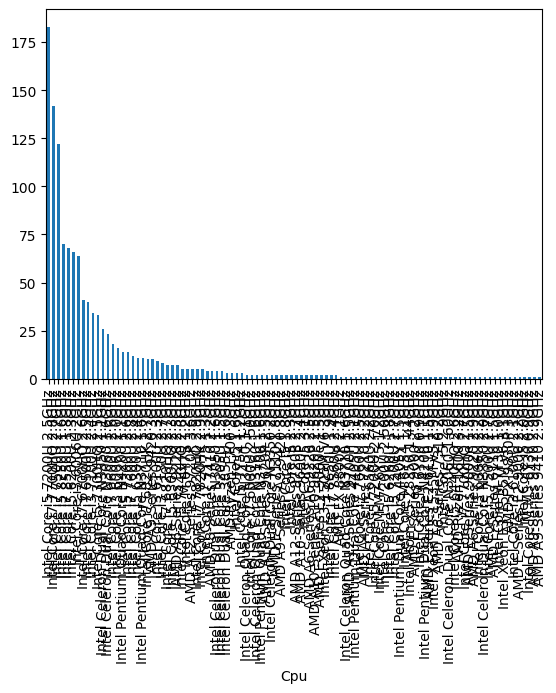

In [244]:
df['Cpu'].value_counts().plot(kind = 'bar')

In [245]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,183
Intel Core i7 7700HQ 2.8GHz,142
Intel Core i7 7500U 2.7GHz,122
Intel Core i5 8250U 1.6GHz,70
Intel Core i7 8550U 1.8GHz,68
...,...
AMD E-Series E2-9000 2.2GHz,1
Intel Core i5 2.0GHz,1
Intel Core M M3-6Y30 0.9GHz,1


In [246]:
a = 'Intel Core i5 7200U 2.5GHz'

In [247]:
a.split() #convert str into List

['Intel', 'Core', 'i5', '7200U', '2.5GHz']

In [248]:
a.split()[0:3]

['Intel', 'Core', 'i5']

In [249]:
" ".join(a.split()[0:3])

'Intel Core i5'

In [250]:
(lambda a :" ".join(a.split()[0:3]))('AMD E-Series E2-9000 2.2GHz')

'AMD E-Series E2-9000'

In [251]:
df['Cpu'] = df['Cpu'].apply(lambda a :" ".join(a.split()[0:3]))

In [252]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i7,483
Intel Core i5,409
Intel Core i3,133
Intel Celeron Dual,64
Intel Pentium Quad,27
AMD A9-Series 9420,11
Intel Core M,10
AMD A6-Series 9220,8
AMD A12-Series 9720P,7


<Axes: xlabel='Cpu'>

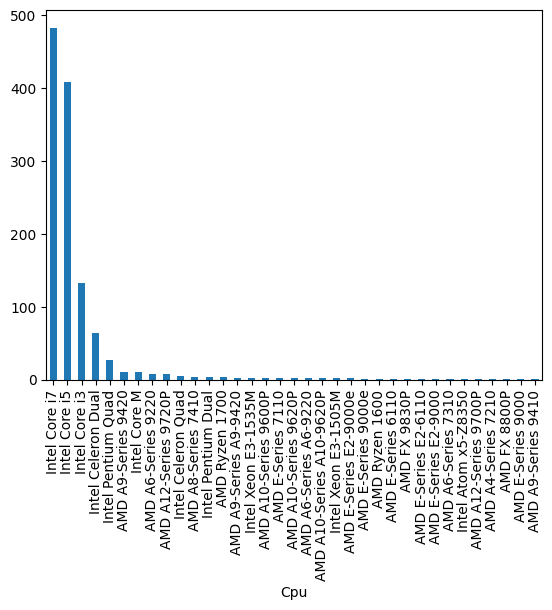

In [253]:
df['Cpu'].value_counts().plot(kind = 'bar')

In [254]:
#Will filter the AMD cpu w.r.t the Series
#AMD A9-Series 9420  >> AMD A-Series
#AMD E-Series 9000   >> AMD E-Series
#AMD FX 8800P        >> AMD F-Series

In [255]:
#for Other processor
a = 'Intel Celeron N4020'
a.split()[0]

'Intel'

In [256]:
#AMD A9-Series 9420  >> AMD A-Series
b = 'AMD A9-Series'
b[4]

'A'

In [257]:
def fetch_pro(text):
  if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
    return text
  elif text.split()[0] == 'Intel':
      return "Other Intel Processor"
  else:
    if text[4] =='A':
      return "AMD A-Series"
    elif text[4] == 'E':
      return "AMD E-Series"
    elif text[4] == 'F':
      return "AMD E-Series"
    else:
      return "AMD Ryzen Series"


In [258]:
fetch_pro('Intel Atom x5-Z8350')

'Other Intel Processor'

In [259]:
df['Cpu'] = df['Cpu'].apply(fetch_pro)

<Axes: xlabel='Cpu'>

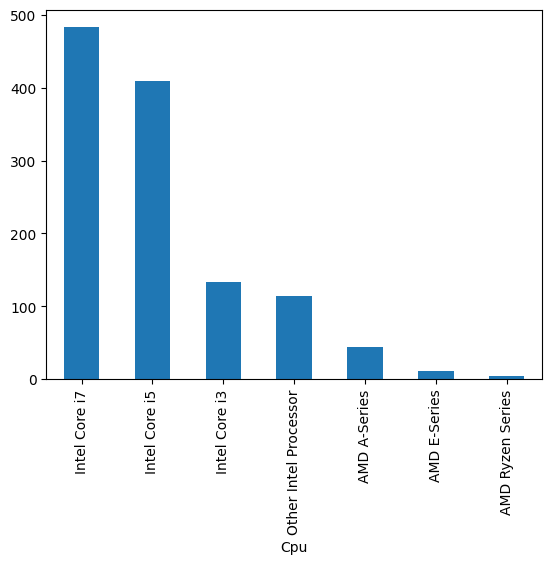

In [260]:
df['Cpu'].value_counts().plot(kind ='bar')

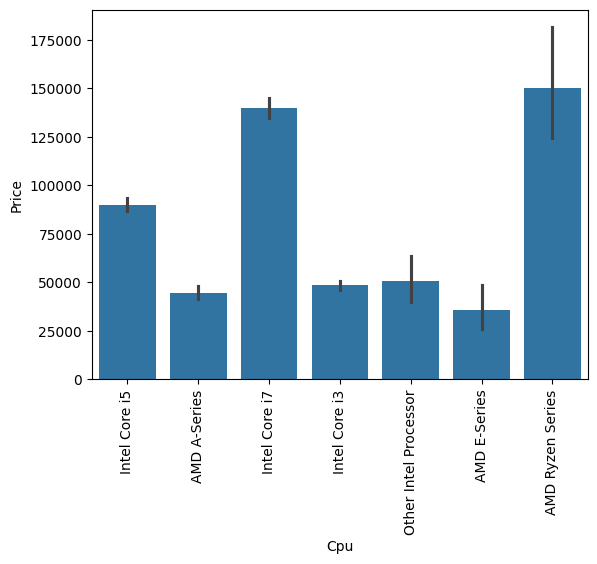

In [261]:
sns.barplot(x = df['Cpu'] , y = df['Price'])
plt.xticks(rotation = 90)
plt.show()

Documentation- In above graph we compare cpu wrt Price.
As we can see that AMD Ryzen Series Processors are more costly compared to other processors.
 in value count we'll see there are very few laptops of AMD Ryzen series but still they are more costly.
 these processors are used in gaming laptops so that might be the reason why gaming laptops are costly.

<Axes: xlabel='Gpu'>

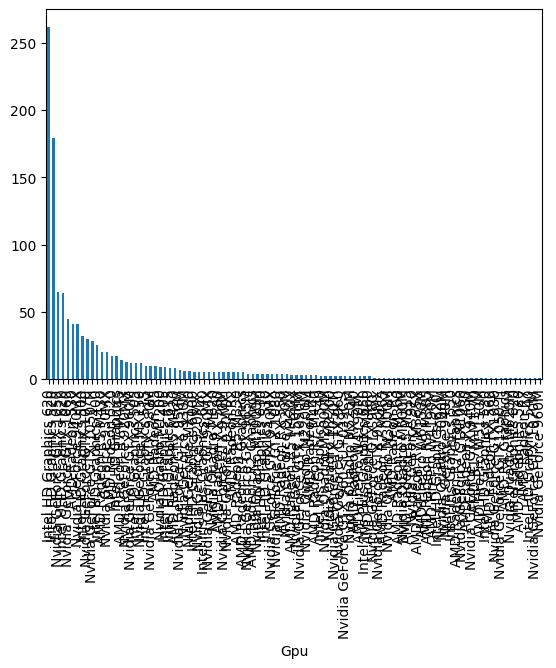

In [262]:
df['Gpu'].value_counts().plot(kind = 'bar')

In [263]:
a = 'Intel HD Graphics 620'
a.split()[0:2]

['Intel', 'HD']

In [264]:
" ".join(a.split()[0:2])

'Intel HD'

In [265]:
(lambda a:" ".join(a.split()[0:2]))('AMD Radeon R5 520')

'AMD Radeon'

In [266]:
df['Gpu'] = df['Gpu'].apply(lambda a:" ".join(a.split()[0:2]))

In [267]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD,570
Nvidia GeForce,353
AMD Radeon,162
Intel UHD,64
Nvidia Quadro,31
Intel Iris,10
AMD FirePro,5
AMD R4,1
AMD R17M-M1-70,1


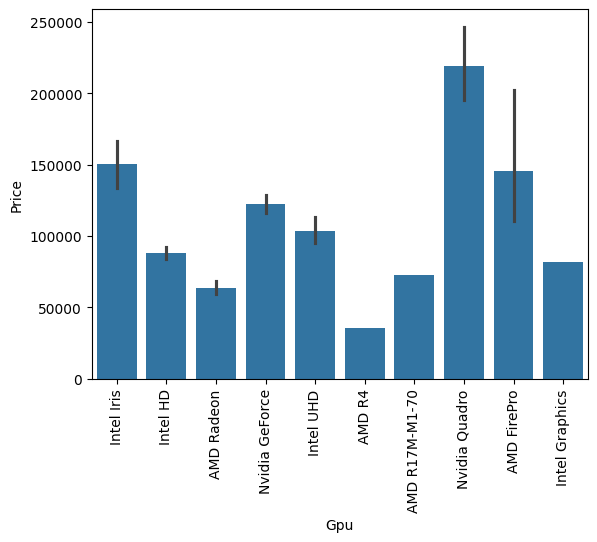

In [268]:
sns.barplot(x = df['Gpu'] , y = df['Price'])
plt.xticks(rotation = 90)
plt.show()

Doc- here Nvidia Quadro is more expensive as compare to other gpu

In [269]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,997
No OS,63
Linux,58
Windows 7,45
Chrome OS,22
macOS,8
Mac OS X,3
Windows 10 S,2


In [270]:
#in windows 10S there are only two laptops this will ad more outliers which might ultimately break our analysis
# so we will take this laptops from 10S to 10, we combine these two columns. similerlly for Mac OS

#Wherever we have Windows 10 or Window 10 S >>> Windows 10
#Windows 7 >> Windows 7
#if we have Mac OS X	or macOS >>  mac OS
#No OS >> No OS
#Linux >> Linux
#Chrome OS >>> Chrome OS

In [271]:
def os (text):
  if text == 'Windows 10' or text == 'Windows 10 S':
    return 'Window 10'
  elif text == 'Windows 7':
    return 'Window 7'
  elif text == 'macOS' or text == 'Mac OS X':
    return 'Mac OS'
  elif text == 'No OS':
    return 'No OS'
  elif text == 'Linux':
    return 'Linux'
  else:
    return 'chrome OS'

In [272]:
os('Windows 10 S')

'Window 10'

In [273]:
df['OpSys'] = df['OpSys'].apply(os)

In [274]:
df['OpSys'].value_counts()

,count
OpSys,
Window 10,999
No OS,63
Linux,58
Window 7,45
chrome OS,22
Mac OS,11


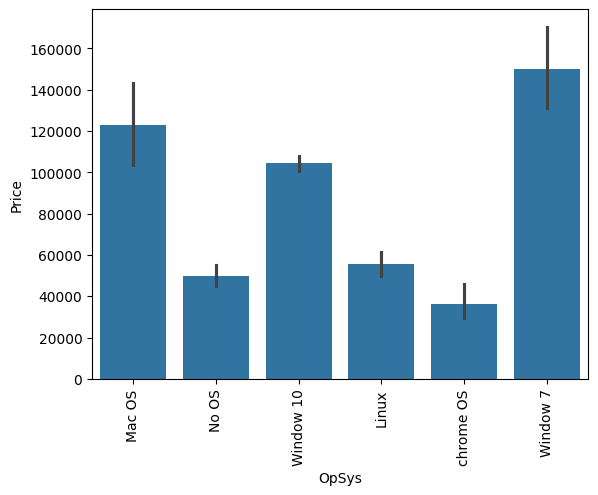

In [275]:
sns.barplot(x = df['OpSys'] , y = df['Price'])
plt.xticks(rotation = 90)
plt.show()

In [276]:
df[df['OpSys'] == 'Window 7']['Price'].describe()

,Price
count,45.000000
mean,150230.088889
std,69300.783238
min,65645.000000
25%,103942.000000
50%,133160.000000
75%,182627.000000
max,390928.000000


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Mac OS'),
  Text(1, 0, 'No OS'),
  Text(2, 0, 'Window 10'),
  Text(3, 0, 'Linux'),
  Text(4, 0, 'chrome OS'),
  Text(5, 0, 'Window 7')])

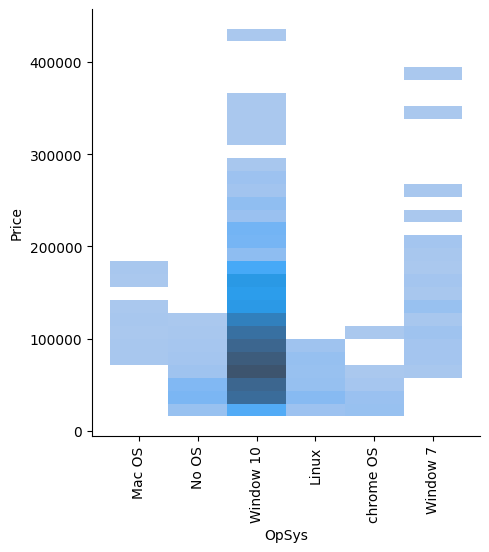

In [277]:
sns.displot(data = df , x = 'OpSys' , y = 'Price' )
plt.xticks(rotation = 90)

In [278]:
df.sample(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ppi,IPS,Touch Screen
866,Toshiba,Ultrabook,Intel Core i5,8,256GB SSD,Intel HD,Window 10,1.20,97532,117.83,0,0
635,Asus,Notebook,Intel Core i5,8,1TB HDD,Nvidia GeForce,Window 10,1.99,80753,141.21,0,0
1030,HP,Notebook,Intel Core i5,4,256GB SSD,Intel HD,Window 10,1.64,86665,111.94,0,0


In [279]:
#Flash Storage
#SDD
#HDD
#Hybrid
df['Memory'].value_counts()

,count
Memory,
256GB SSD,387
1TB HDD,213
500GB HDD,122
512GB SSD,99
128GB SSD + 1TB HDD,93
256GB SSD + 1TB HDD,73
128GB SSD,71
32GB Flash Storage,28
2TB HDD,16


In [280]:
df['Memory'].str.split('+',n=1,expand=True).sample(5)

,0,1
234,256GB SSD,None
1250,500GB HDD,None
1074,256GB SSD,None
935,256GB SSD,None
52,256GB SSD,None


In [281]:
new = df['Memory'].str.split('+',n=1,expand=True)
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ppi,IPS,Touch Screen
814,Dell,Notebook,Intel Core i5,8,256GB SSD,AMD Radeon,Window 10,2.18,70348,141.21,0,0
1129,HP,Gaming,Intel Core i5,8,128GB SSD + 1TB HDD,Nvidia GeForce,Window 10,3.35,100560,127.34,1,0
152,Lenovo,Notebook,Intel Core i5,4,128GB SSD,Intel HD,Window 10,1.90,44357,100.45,0,0
47,Asus,Gaming,AMD Ryzen Series,8,256GB SSD + 1TB HDD,AMD Radeon,Window 10,3.20,115702,127.34,0,0
947,Lenovo,Notebook,Intel Core i7,8,1TB HDD,Nvidia GeForce,No OS,2.20,61013,141.21,0,0


In [282]:
df['first']=new[0]
df['first']=df['first'].str.strip() #strip() to remove extra whitespaces

In [283]:
df['second']=new[1]


In [284]:
df['first'].apply(lambda x:1 if "HDD" in x else 0)

,first
0,0
1,0
2,0
4,0
5,1
...,...
1269,1
1270,0
1271,0
1272,0


In [285]:
# SSD
# HDD
# Hybrid
# Flash Storage
new=df['Memory'].str.split('+',n=1,expand=True)
df['first']=new[0] # 0 column
df['first']=df['first'].str.strip()
df['second']=new[1] # 1 column

#if in "first" there is HDD then return 1 else 0. similarly for ssd, hybrid and flash storage
df['Layer1HDD']=df['first'].apply(lambda x:1 if "HDD" in x else 0)
df['Layer1SSD']=df['first'].apply(lambda x:1 if "SSD" in x else 0)
df['Layer1Hybrid']=df['first'].apply(lambda x:1 if "Hybrid" in x else 0)
df['Layer1Flash_Storage']=df['first'].apply(lambda x:1 if "Flash Storage" in x else 0)

#relpacing "\D" with just nothing. regex(regular expression used to search for, validate, or manipulate strings and patterns in text)
df['first']=df['first'].str.replace(r'\D','',regex=True)


df['second'].fillna("0",inplace=True) #filling missing values

df['second']=df['second'].str.strip()
df['Layer2HDD']=df['second'].apply(lambda x:1 if "HDD" in x else 0)
df['Layer2SSD']=df['second'].apply(lambda x:1 if "SSD" in x else 0)
df['Layer2Hybrid']=df['second'].apply(lambda x:1 if "Hybrid" in x else 0)
df['Layer2Flash_Storage']=df['second'].apply(lambda x:1 if "Flash Storage" in x else 0)

df['second']=df['second'].str.replace(r'\D','',regex=True)

#change data types
df['first']=df['first'].astype('int')
df['second']=df['second'].astype('int')

#add columns
df['HDD']=df['first']*df['Layer1HDD']+df['second']*df['Layer2HDD']

df['SSD']=df['first']*df['Layer1SSD']+df['second']*df['Layer2SSD']

df['Hybrid']=df['first']*df['Layer1Hybrid']+df['second']*df['Layer2Hybrid']

df['Flash_Storage']=df['first']*df['Layer1Flash_Storage']+df['second']*df['Layer2Flash_Storage']

#drop unnecessary columns
df.drop(columns=['first','second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage',
                 'Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2Flash_Storage'],inplace=True)

<ipython-input-285-ef35fdb2c713>:20: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [286]:
df.to_csv("LPAcleaned.csv")